### SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Load Dataset

In [2]:
train = pd.read_csv("mitbih_train.csv", header=None)
test  = pd.read_csv("mitbih_test.csv", header=None)

X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


### Some EDA 

,Count,Percentage (%)
187,,
0.0,72471,82.77
1.0,2223,2.54
2.0,5788,6.61
3.0,641,0.73
4.0,6431,7.35


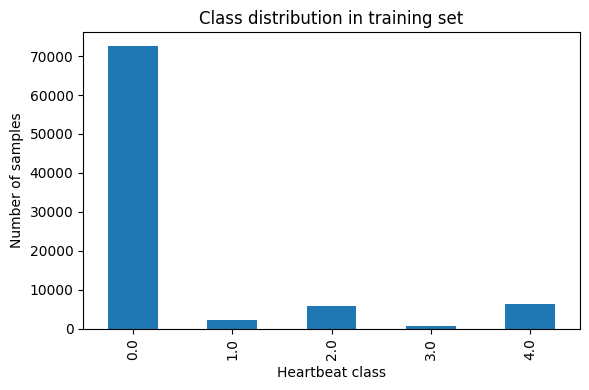

In [3]:
class_counts = y.value_counts().sort_index()
class_percent = (class_counts / len(y) * 100).round(2)

display(pd.DataFrame({
    "Count": class_counts,
    "Percentage (%)": class_percent
}))

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')
plt.xlabel("Heartbeat class")
plt.ylabel("Number of samples")
plt.title("Class distribution in training set")

plt.tight_layout()

plt.show()


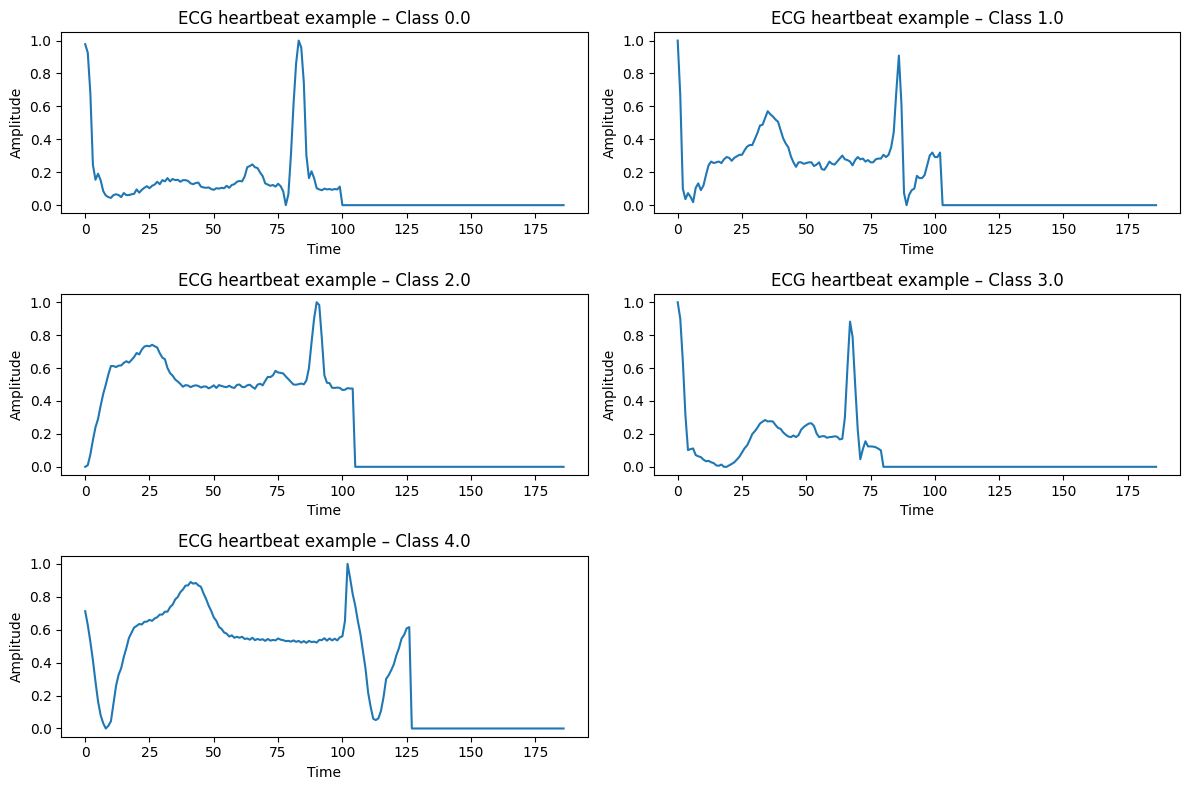

In [4]:
plt.figure(figsize=(12,8))

for i, cls in enumerate(sorted(y.unique()), 1):
    plt.subplot(3, 2, i)
    idx = y[y == cls].index[0]
    plt.plot(X.loc[idx])
    plt.title(f"ECG heartbeat example – Class {cls}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

### Using randomForest

Train - Val Split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(X_train.shape, X_val.shape)


(70043, 187) (17511, 187)


RandomForest model 

In [6]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

Val Test evaluation 

In [7]:
y_val_pred = rf.predict(X_val)

print("Validation accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


y_test_pred = rf.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Validation accuracy: 0.9752726857403917
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     14494
         1.0       0.96      0.60      0.74       445
         2.0       0.98      0.88      0.93      1158
         3.0       0.96      0.61      0.75       128
         4.0       1.00      0.96      0.98      1286

    accuracy                           0.98     17511
   macro avg       0.98      0.81      0.88     17511
weighted avg       0.98      0.98      0.97     17511

Test accuracy: 0.9719989037091175
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.97      0.57      0.72       556
         2.0       0.98      0.87      0.92      1448
         3.0       0.83      0.59      0.69       162
         4.0       1.00      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.95      0.79      0.86     21892
wei

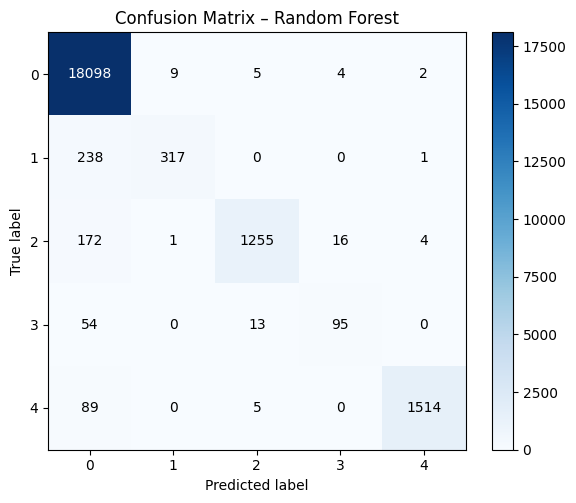

In [8]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues") 
plt.colorbar()               

classes = range(cm.shape[0])
plt.xticks(classes, classes)
plt.yticks(classes, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix – Random Forest")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > cm.max()/2 else "black"
        )

plt.tight_layout()
plt.show()
